In [1]:
from datetime import datetime
date_range = (
        datetime(2013,4,10),
        datetime(2013,4,11))

In [2]:
import datacube
dc= datacube.Datacube()

# from bounding box
# https://boundingbox.klokantech.com/
extent = (30.209661,-2.218817,30.246396,-2.163926)

x = (extent[0],extent[2])
y = (extent[1],extent[3])

print (x,y)

aoix = x
aoiy = y

(30.209661, 30.246396) (-2.218817, -2.163926)


In [3]:
product = 'l8_rwanda'
ds = dc.load(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

TONY product= l8_rwanda


In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 1, x: 137, y: 204)
Coordinates:
  * time     (time) datetime64[ns] 2013-04-10T08:07:38.966632
  * y        (y) float64 -2.394e+05 -2.395e+05 ... -2.455e+05 -2.455e+05
  * x        (x) float64 1.896e+05 1.896e+05 1.897e+05 ... 1.937e+05 1.937e+05
Data variables:
    red      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    green    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    blue     (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
Attributes:
    crs:      epsg:32636

## Its all Black 

### Isn't it?

/usr/local/lib/python3.5/dist-packages/skimage/exposure/exposure.py:129: RuntimeWarning: invalid value encountered in true_divide
  img_cdf = img_cdf / float(img_cdf[-1])


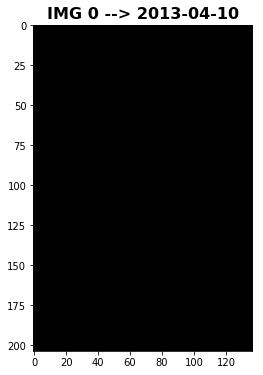

In [5]:
from noteLib import *
%matplotlib inline
for t in range(0,len(ds.time)):
    cnt=t
    figsize=[6,6]
    plot_labeled_rgb(ds, t, cnt, figsize=figsize)

In [6]:
def return_path_row(file_path):
    a = file_path.split('_')
    print(a[2], a[3])
    return(a[2])

In [7]:
dsets = dc.find_datasets(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

In [8]:
dsets

[Dataset <id=e199fdc9-f750-4feb-b7e5-c6c005ddce02 type=l8_rwanda location=None>]

In [9]:
myds = dsets[0]

print(type(myds))

print(len(dsets))
print ("Number of Datasets")
print(myds.crs)
for uri in myds.uris:
    print(uri)
print(myds.extent)

<class 'datacube.model.Dataset'>
1
Number of Datasets
epsg:32636
/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1.xml:
Geometry({'coordinates': [[(187200.0, -429600.0), (187200.0, -210900.0), (411600.0, -210900.0), (411600.0, -429600.0), (187200.0, -429600.0)]], 'type': 'Polygon'}, CRS('epsg:32636'))


In [10]:
print (myds.measurements['red']['path'])

fp = myds.measurements['red']['path']

return_path_row(fp)

/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif
172062 20130410


'172062'

# Display Image Extent from Dataset Postgres

### PINK

In [11]:
print(myds.bounds)

ulX = myds.bounds.left
ulY = myds.bounds.top

lrX = myds.bounds.right
lrY = myds.bounds.bottom

print(myds.crs)
ep = myds.crs
m = prj_base_map(ulX,ulY,lrX,lrY,resolution=None, epsg=ep)


prj_display_map(m,ulX,ulY,lrX,lrY, color='pink', epsg=ep)

BoundingBox(left=187200.0, bottom=-429600.0, right=411600.0, top=-210900.0)
epsg:32636


# Now DISPLAY THe AOI in RED

In [12]:
print (aoix, aoiy)

ul_lon = aoix[0]
ul_lat = aoiy[1]

lr_lon = aoix[1]
lr_lat = aoiy[0]

from prepare import *
ulx,uly = ge_translate(ul_lat,ul_lon,epsg=ep)

print(ulx,uly)

lrx,lry = ge_translate(lr_lat,lr_lon,epsg=ep)


(30.209661, 30.246396) (-2.218817, -2.163926)
-2.163926 30.209661
189601.87095402722 -239465.5448399979
189601.87095402722 -239465.5448399979
-2.218817 30.246396
193702.6361856839 -245532.30215066415


In [13]:
prj_display_map(m,ulx,uly,lrx,lry, color='red', epsg=ep)

In [14]:
mulp = (  30.4920097,  -0.4581216)
mlrp = (  32.5129536,  -2.4401231)

my_ul = [mulp[1], mulp[0]]

my_lr = [mlrp[1], mlrp[0]]

print (my_ul)
#(mulx,muly) = ge_untranslate(mulp[0],mulp[1], epsg='epsg:4326')

# (mlrx,mlry) = ge_untranslate(mlrp[0],mlrp[1], epsg='epsg:4326')

#print(mulx,muly)
#print(mlrx,mlry)

[-0.4581216, 30.4920097]


In [15]:
import os
merc = os.path.join('/home/tony/', 'mercator.jpg')

# m = folium.Map([37, 0], zoom_start=1, tiles='stamentoner')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW',
    image=merc,
    # bounds=[(mulp[1],mulp[0]),(mlrp[1],mlrp[0])],
    #bounds=[[-0.45, 30.49], [-2.44, 32.51]],
    bounds=[my_ul, my_lr],
    #
    opacity=0.3,
    interactive=True,
    cross_origin=False,
    zindex=1,
)

folium.Popup('I am an image').add_to(img)

img.add_to(m)

folium.LayerControl().add_to(m)

In [16]:
m

In [17]:
myds.measurements['red']['path']

'/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif'

In [18]:
!gdalinfo '/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif'

Driver: GTiff/GeoTIFF
Files: /mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif
Size is 7481, 7291
Coordinate System is:
PROJCS["WGS 84 / UTM zone 36N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",33],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32636"]]
Origin = (187185.000000000000000,-21088

# contrast streting info

https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-4-working-with-satellite-data-d3835b5e2971

In [19]:
%%bash

img='/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif'

outimg='/data/tmp/red.tif'

better='/data/tmp/red1.tif'

best='/data/tmp/red1.png'

gdal_translate $img $outimg -of Gtiff -outsize 10% 10% -scale

gdalinfo $outimg


echo "-----------------------------------------"
echo "-----------------------------------------"

echo "-----------------------------------------"



gdalinfo -mm $outimg

gdal_translate $outimg $better -scale 0 372 0 65535 -exponent 0.5

gdal_translate $better $best -of PNG -ot UInt16


Input file size is 7481, 7291
0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: /data/tmp/red.tif
Size is 748, 729
Coordinate System is:
PROJCS["WGS 84 / UTM zone 36N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",33],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32636"]]
Origin = (187185.000000000000000,-210885.000000000000000

In [20]:
print (my_ul)

[-0.4581216, 30.4920097]


In [21]:
import os
merc = os.path.join('/data/tmp', 'red1.png')

m = folium.Map([37, 0], zoom_start=1, tiles='stamentoner')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW',
    image=merc,
    # bounds=[(mulp[1],mulp[0]),(mlrp[1],mlrp[0])],
    #bounds=[[-0.45, 30.49], [-2.44, 32.51]],
    bounds=[my_ul, my_lr],
    #
    opacity=0.4,
    interactive=True,
    cross_origin=False,
    zindex=1,
)

folium.Popup('I am an image').add_to(img)

img.add_to(m)

folium.LayerControl().add_to(m)

In [22]:
m